## CSCA 5642 Week 4 Project - Natural Language Processing

#### The tweet dataset downloaded from Kaggle (https://www.kaggle.com/c/nlp-getting-started/data?select=train.csv) includes text from tweets that contain language linking them to disasters. The purpose of this program will be to identify which tweets are about real disasters and which tweets are not actually about a disaster.

##### The training dataset contains a csv with 10,000 tweets for training, along with a keyword from the tweet and the location of the tweet, both of which may be blank.

#####

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## EDA and Data Cleaning
#### Data is downloaded from the Kaggle API. It will be imported into a pandas Dataframe and separated into train data and labels.

In [2]:
train_data = pd.read_csv('train.csv')
print(train_data.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
train_labels = train_data['target']

In [4]:
print(train_labels.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


## EDA and Data Cleaning
#### First, I want to know how many keywords and locations are NaN.

In [5]:
na_keywords = train_data['keyword'].isna().sum()
na_locs = train_data['location'].isna().sum()
print('NaN keywords:', na_keywords)
print('NaN locations:', na_locs)

NaN keywords: 61
NaN locations: 2533


#### There are quite a few locations missing. That might impact the analysis if we use it in the model.
#### I also want to know how many tweets are labeled 0s and 1s

[4342, 3271]


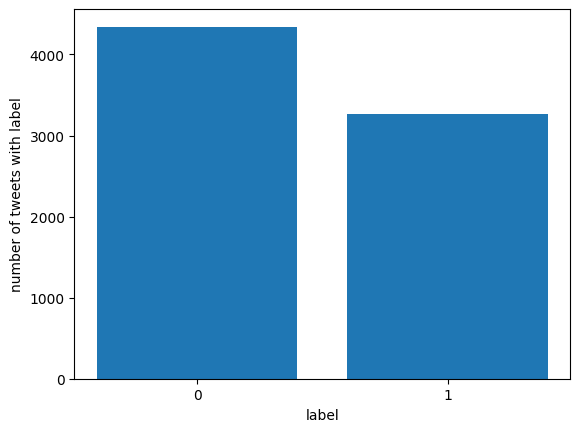

In [6]:
vals = train_labels.value_counts().tolist()
print(vals)
plt.bar(['0','1'],vals)
plt.xlabel('label')
plt.ylabel('number of tweets with label')
plt.show()

#### Let's look at some example tweets

In [7]:
print('labeled 0:')
train_data[train_data['target'] == 0]['text'].values[1:10]

labeled 0:


array(['I love fruits', 'Summer is lovely', 'My car is so fast',
       'What a goooooooaaaaaal!!!!!!', 'this is ridiculous....',
       'London is cool ;)', 'Love skiing', 'What a wonderful day!',
       'LOOOOOOL'], dtype=object)

In [8]:
print('labeled 1:')
train_data[train_data['target'] == 1]['text'].values[1:10]

labeled 1:


array(['Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       '13,000 people receive #wildfires evacuation orders in California ',
       'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
       '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
       '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
       "I'm on top of the hill and I can see a fire in the woods...",
       "There's an emergency evacuation happening now in the building across the street",
       "I'm afraid that the tornado is coming to our area..."],
      dtype=object)

In [9]:
print(train_data['keyword'].dtype)
print(train_data['keyword'].astype('string'))
print(train_data['keyword'].tolist())

object
0       <NA>
1       <NA>
2       <NA>
3       <NA>
4       <NA>
        ... 
7608    <NA>
7609    <NA>
7610    <NA>
7611    <NA>
7612    <NA>
Name: keyword, Length: 7613, dtype: string
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'ac

#### Need to make sure all inputs are strings and separate two-word keywords so they can be split with whitespace

In [10]:
train_data['keyword'] = train_data['keyword'].astype('string')
train_data['location'] = train_data['location'].astype('string')
train_data['text'] = train_data['text'].astype('string')
train_data['target'] = train_data['target'].astype('float')

In [11]:
train_data['keyword'] = train_data['keyword'].apply(lambda x: x.replace('%20', ' ') if pd.notna(x) is True else x)
print(train_data['keyword'].tolist())

[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'aftershock', 'aftershock', 'afte

In [12]:
print(train_data['location'].tolist())

[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA', 'Philadelphia, PA', 'London, UK', 'Pretoria', 'World Wide!!', <NA>, 'Paranaque City', 'Live On Webcam', <NA>, 'milky way', <NA>, <NA>, <NA>, 'GREENSBORO,NORTH CAROLINA', <NA>, 'Live On Webcam', 'England.', 'Sheffield Township, Ohio', 'India', 'Barbados', 'Anaheim', 'Abuja', 'USA', 'South Africa', 'Sao Paulo, Brazil', 'hollywoodland ', 'Edmonton, Alberta - Treaty 6', <NA>, 'Inang Pamantasan', 'Twitter Lockout in progress', 'Concord, CA', 'Calgary, AB', 'Birmingham', 'San Francisco', 'CLVLND', 'Nashville, TN', 'Santa Clara, CA', 'UK', 'St. Louis, MO', 'Walker County, Alabama', 'Australia', 'North Carolina', <NA>, 'Norf Carolina', 'San Mateo County, CA', 'North Carolina', 'Njoro, Kenya', <NA>, "Your Sister's Bedroom", <NA>, 'Arlington, TX', 'South B

#### These locations look for the most part unhelpful so I'm not going to include them in the analysis for now
#### To include the keywords, we'll need to drop all of the N/A values. There are only 61 so that should be okay, but we'll make it into a new dataframe in case we want to exclude keywords later.

In [13]:
train_data = train_data.drop(columns = ['location'])
new_train_data = train_data.dropna(subset = ['text','keyword'])
print(new_train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7552 entries, 31 to 7582
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       7552 non-null   int64  
 1   keyword  7552 non-null   object 
 2   text     7552 non-null   string 
 3   target   7552 non-null   float64
dtypes: float64(1), int64(1), object(1), string(1)
memory usage: 295.0+ KB
None


In [14]:
new_train_labels = new_train_data['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(new_train_data,new_train_labels,train_size=0.8)

#### Now need to convert the data to a tf dataset

In [34]:
train_features = {'keyword': tf.constant(X_train['keyword']),'text': tf.constant(X_train['text'])}
train_labels = tf.constant(y_train)
test_features = {'keyword': tf.constant(X_test['keyword']),'text': tf.constant(X_test['text'])}
test_labels = tf.constant(y_test)
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_labels))

In [17]:
# Print dataset structure
print(f"Dataset structure: {train_dataset}")

# Print a sample
for sample in train_dataset.take(1):
    print(f"Sample structure: {sample}")
    if isinstance(sample, tuple):
        print(f"X type: {type(sample[0])}")
        print(f"X keys: {sample[0].keys()}")
    else:
        print(f"Sample type: {type(sample)}")

Dataset structure: <_TensorSliceDataset element_spec=({'keyword': TensorSpec(shape=(), dtype=tf.string, name=None), 'text': TensorSpec(shape=(), dtype=tf.string, name=None)}, TensorSpec(shape=(), dtype=tf.float64, name=None))>
Sample structure: ({'keyword': <tf.Tensor: shape=(), dtype=string, numpy=b'weapon'>, 'text': <tf.Tensor: shape=(), dtype=string, numpy=b'BREAKING: Obama Officials GAVE Muslim Terrorist the Weapon Used in Texas Attack http://t.co/RJcaxjp4oS'>}, <tf.Tensor: shape=(), dtype=float64, numpy=1.0>)
X type: <class 'dict'>
X keys: dict_keys(['keyword', 'text'])


In [35]:
import re
import string

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')

In [36]:
from tensorflow.keras.layers import TextVectorization
vectorizers = []
feature_names = ['keyword', 'text']
vocab_size = 1000000
output_length = 500
for feature in feature_names:
    data = [sample[feature].decode("utf-8") for sample in train_dataset.map(lambda x, y: x).as_numpy_iterator()]
    vectorizer = TextVectorization(max_tokens=vocab_size, output_sequence_length = output_length, standardize=custom_standardization)
    vectorizer.adapt(data)
    vectorizers.append(vectorizer)


def vectorize_text(features, label=None):
    keyword_vectorized = vectorizers[0](features['keyword'])  # Vectorized output
    text_vectorized = vectorizers[1](features['text'])
    if label is not None:
      return [{'keyword': keyword_vectorized, 'text': text_vectorized}, label]
    else:
      return [{'keyword': keyword_vectorized, 'text': text_vectorized}]



In [38]:
# vectorizers = vectorize_text(train_dataset)
train_data_vect = vectorize_text(train_features, train_labels)
val_data_vect = vectorize_text(test_features, test_labels)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data_vect[0], train_data_vect[1])).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((val_data_vect[0], val_data_vect[1])).batch(32)

In [40]:
for batch in train_dataset.take(1):
    features, labels = batch
    print(f"Features type: {type(features)}")
    for name, tensor in features.items():
        print(f"{name} shape: {tensor.shape}, dtype: {tensor.dtype}")
    print(f"Labels shape: {labels.shape}")

Features type: <class 'dict'>
keyword shape: (32, 500), dtype: <dtype: 'int64'>
text shape: (32, 500), dtype: <dtype: 'int64'>
Labels shape: (32,)


## Design Model Architecture
#### Will start with a vanilla RNN model with a preprocessing layer for natural language processing, then try LSTM and GRU

In [98]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TextVectorization, SimpleRNN, LSTM, GRU, Dense, Embedding, Concatenate, Dropout, Flatten, Reshape, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import Input

def build_model(layer='simple', units = 64, units2 = 64, d_activation='sigmoid', output_length=output_length, learning_rate=0.001):
    keyword_vocab_size = 10000
    text_vocab_size = 50000
    embedding_dim = 128

    if layer == 'LSTM':
        layer = LSTM
    elif layer == 'GRU':
        layer = GRU
    else:
        layer = SimpleRNN

    keyword_input = Input(shape=(output_length,), dtype=tf.int64, name='keyword')
    keyword_embedded = Embedding(input_dim=keyword_vocab_size + 1,output_dim=embedding_dim,input_length=output_length)(keyword_input)
    keyword_rnn = layer(units, return_sequences = True)(keyword_embedded)

    text_input = Input(shape=(output_length,), dtype=tf.int64, name='text')
    text_embedded = Embedding(input_dim=text_vocab_size + 1,output_dim=embedding_dim,input_length=output_length)(text_input)
    text_rnn = layer(units, return_sequences = True)(text_embedded)

    combined = Concatenate(axis = 2)([keyword_rnn, text_rnn])

    x = Bidirectional(layer(units, return_sequences = True))(combined)
    x = Dropout(0.5)(x)

    x = Bidirectional(layer(units2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(units2//2, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Dense(units2//4, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    output = Dense(1,activation=d_activation)(x)

    inputs = {'keyword': keyword_input,
            'text': text_input}
    model = Model(inputs,output)
    model.compile(optimizer = Adam(learning_rate = learning_rate, clipnorm = 1.2), loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [64]:
model1 = build_model()
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ keyword (InputLayer)      │ (None, 500)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text (InputLayer)         │ (None, 500)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_24 (Embedding)  │ (None, 500, 128)       │      1,280,128 │ keyword[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_25 (Embedding)  │ (None, 500, 128)       │      6,400,128 │ text[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_37 (SimpleRNN) │ (None, 500, 64)        │         12,352 │ embedding_24[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_38 (SimpleRNN) │ (None, 500, 64)        │         12,352 │ embedding_25[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12            │ (None, 500, 128)       │              0 │ simple_rnn_37[0][0],   │
│ (Concatenate)             │                        │                │ simple_rnn_38[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_39 (SimpleRNN) │ (None, 500, 64)        │         12,352 │ concatenate_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 500, 64)        │              0 │ simple_rnn_39[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_40 (SimpleRNN) │ (None, 64)             │          8,256 │ dropout_15[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 64)             │            256 │ simple_rnn_40[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 64)             │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 32)             │          2,080 │ dropout_16[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 32)             │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 16)             │            528 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             17 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,728,449 (29.48 MB)

 Trainable params: 7,728,321 (29.48 MB)

 Non-trainable params: 128 (512.00 B)

In [65]:
m1_hist = model1.fit(train_dataset, validation_data = val_dataset, epochs=15)

Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 104s 515ms/step - accuracy: 0.5580 - loss: 0.7392 - val_accuracy: 0.4242 - val_loss: 0.6959
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 97s 512ms/step - accuracy: 0.5631 - loss: 0.6900 - val_accuracy: 0.5758 - val_loss: 0.6909
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 509ms/step - accuracy: 0.5657 - loss: 0.6867 - val_accuracy: 0.5758 - val_loss: 0.6872
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 507ms/step - accuracy: 0.5730 - loss: 0.6867 - val_accuracy: 0.5758 - val_loss: 0.6819
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 97s 513ms/step - accuracy: 0.5730 - loss: 0.6870 - val_accuracy: 0.5758 - val_loss: 0.6826
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 510ms/step - accuracy: 0.5770 - loss: 0.6861 - val_accuracy: 0.5758 - val_loss: 0.6816
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 97s 512ms/step - accuracy: 0.5769 - loss: 0.6836 - val_accuracy: 0.5758 - val_loss: 0.6837
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 508ms/step - accuracy: 0.5791 - loss: 

#### Check if model has converged after 15 epochs

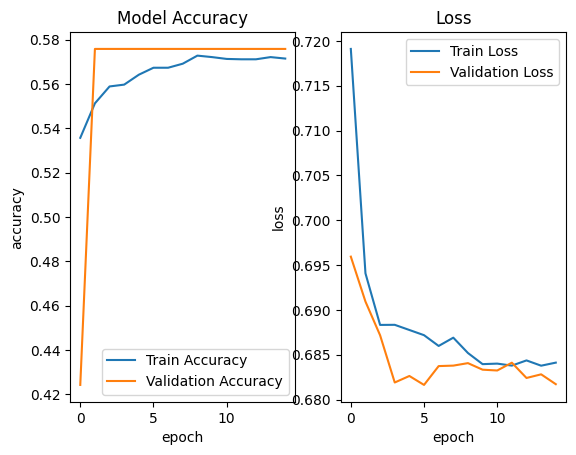

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(m1_hist.history['accuracy'], label='Train Accuracy')
ax1.plot(m1_hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend()
ax2.plot(m1_hist.history['loss'], label='Train Loss')
ax2.plot(m1_hist.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend()
fig.show()

#### Model has not converged. Need to add more epochs to this model if we continue with it later

#### LSTM Model

In [67]:
model2 = build_model(layer = 'LSTM')
m2_hist = model2.fit(train_dataset, validation_data = val_dataset, epochs=15)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 163s 821ms/step - accuracy: 0.5687 - loss: 0.6904 - val_accuracy: 0.5758 - val_loss: 0.6849
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 155s 818ms/step - accuracy: 0.5764 - loss: 0.6851 - val_accuracy: 0.5758 - val_loss: 0.6853
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 155s 819ms/step - accuracy: 0.5784 - loss: 0.6827 - val_accuracy: 0.5758 - val_loss: 0.9069
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 153s 810ms/step - accuracy: 0.5775 - loss: 0.6821 - val_accuracy: 0.5758 - val_loss: 0.6902
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 154s 814ms/step - accuracy: 0.5763 - loss: 0.6825 - val_accuracy: 0.5758 - val_loss: 0.6824
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 154s 814ms/step - accuracy: 0.5793 - loss: 0.6829 - val_accuracy: 0.5758 - val_loss: 0.6901
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 153s 812ms/step - accuracy: 0.5794 - loss: 0.6817 - val_accuracy: 0.5758 - val_loss: 0.6836
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 153s 812ms/step - accuracy: 0.5788 -

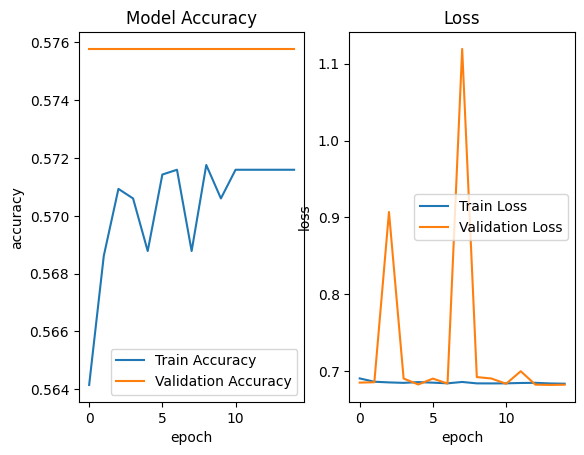

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(m2_hist.history['accuracy'], label='Train Accuracy')
ax1.plot(m2_hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend()
ax2.plot(m2_hist.history['loss'], label='Train Loss')
ax2.plot(m2_hist.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend()
fig.show()

#### GRU Model

In [69]:
model3 = build_model(layer = 'GRU')
m3_hist = model3.fit(train_dataset, validation_data = val_dataset, epochs=15)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 173s 863ms/step - accuracy: 0.5292 - loss: 0.6981 - val_accuracy: 0.5758 - val_loss: 0.6845
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 161s 855ms/step - accuracy: 0.5728 - loss: 0.6827 - val_accuracy: 0.5758 - val_loss: 0.6843
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 162s 855ms/step - accuracy: 0.5804 - loss: 0.6865 - val_accuracy: 0.5758 - val_loss: 0.6904
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 162s 856ms/step - accuracy: 0.5705 - loss: 0.6848 - val_accuracy: 0.5758 - val_loss: 0.6824
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 161s 854ms/step - accuracy: 0.5700 - loss: 0.6888 - val_accuracy: 0.5758 - val_loss: 0.6818
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 161s 855ms/step - accuracy: 0.5783 - loss: 0.6829 - val_accuracy: 0.5758 - val_loss: 0.6818
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 161s 853ms/step - accuracy: 0.5770 - loss: 0.6855 - val_accuracy: 0.5758 - val_loss: 0.6823
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 161s 851ms/step - accuracy: 0.5796 - loss: 0.68

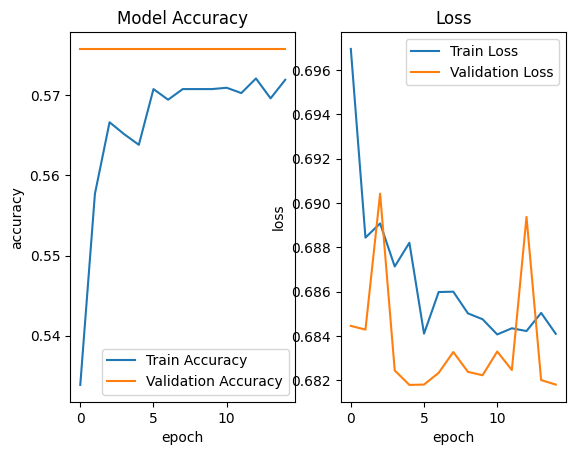

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(m3_hist.history['accuracy'], label='Train Accuracy')
ax1.plot(m3_hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend()
ax2.plot(m3_hist.history['loss'], label='Train Loss')
ax2.plot(m3_hist.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend()
fig.show()

## GRU worked best, so will move forward with GRU.
#### Add in clipnorm to optimizer and learning rate reduction.

In [79]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model4 = build_model(layer = 'GRU', units = 128, learning_rate = 0.00001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
m4_hist = model4.fit(train_dataset, validation_data = val_dataset, epochs=25, callbacks = [reduce_lr])

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.4628 - loss: 0.7010 - val_accuracy: 0.5824 - val_loss: 0.6924 - learning_rate: 1.0000e-05
Epoch 2/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.4918 - loss: 0.6952 - val_accuracy: 0.5778 - val_loss: 0.6921 - learning_rate: 1.0000e-05
Epoch 3/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.5209 - loss: 0.6920 - val_accuracy: 0.6208 - val_loss: 0.6899 - learning_rate: 1.0000e-05
Epoch 4/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.5512 - loss: 0.6886 - val_accuracy: 0.6181 - val_loss: 0.6864 - learning_rate: 1.0000e-05
Epoch 5/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.5510 - loss: 0.6880 - val_accuracy: 0.6506 - val_loss: 0.6845 - learning_rate: 1.0000e-05
Epoch 6/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.5960 - loss: 0.6835 - val_accuracy: 0.6929 - val_loss: 0.6791 - learning_rate: 1.0000e-05
Epoch 7/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.62

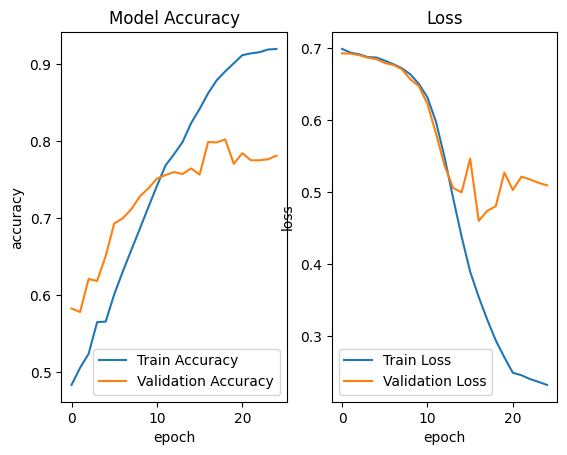

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(m4_hist.history['accuracy'], label='Train Accuracy')
ax1.plot(m4_hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend()
ax2.plot(m4_hist.history['loss'], label='Train Loss')
ax2.plot(m4_hist.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend()
fig.show()

#### Didn't converge fully and was overfitting. Will increase the starting learning rate and add kernel regularization. Number of epochs required for convergence was reduced drastically, so also reduced number of epochs for this model.

In [99]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
model5 = build_model(layer = 'GRU', learning_rate = 0.001)
m5_hist = model5.fit(train_dataset, validation_data = val_dataset, epochs=10, callbacks = [reduce_lr])

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 195s 956ms/step - accuracy: 0.5652 - loss: 1.3743 - val_accuracy: 0.6929 - val_loss: 0.9961 - learning_rate: 0.0010
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 178s 944ms/step - accuracy: 0.8452 - loss: 0.7651 - val_accuracy: 0.7730 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 179s 946ms/step - accuracy: 0.9270 - loss: 0.4297 - val_accuracy: 0.7889 - val_loss: 0.6736 - learning_rate: 0.0010
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 178s 941ms/step - accuracy: 0.9592 - loss: 0.2396 - val_accuracy: 0.7267 - val_loss: 0.7974 - learning_rate: 0.0010
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 179s 946ms/step - accuracy: 0.9703 - loss: 0.1570 - val_accuracy: 0.6420 - val_loss: 1.0590 - learning_rate: 0.0010
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 178s 941ms/step - accuracy: 0.9759 - loss: 0.1308 - val_accuracy: 0.7750 - val_loss: 0.6958 - learning_rate: 2.0000e-04
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 178s 945ms/step - ac

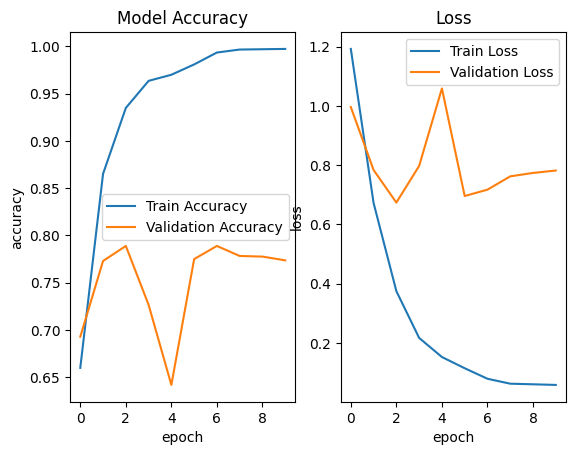

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(m5_hist.history['accuracy'], label='Train Accuracy')
ax1.plot(m5_hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend()
ax2.plot(m5_hist.history['loss'], label='Train Loss')
ax2.plot(m5_hist.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend()
fig.show()

## Discussion and Conclusions

#### The final model predicted if tweets were about a disaster or not with an accuracy of XX%. The best model was a GRU model with 128 units and learning rate reduction.

#### The most effective change made was to implement the clipnorm feature in the optimizer and add learning rate reduction. These additions helped the model train much better much faster. Other important hyperparameters were units for each of the RNN layers, and increasing the units from low numbers initially tested like 6 to 64+ greatly improved model performance.

#### There are many ways to have made this model better. I didn't include location in this model, and it's possible that including the location parameter could have improved model performance. A lot of time was spent implementing the text vectorization, and I think that process could be improved.

In [181]:
test_data = pd.read_csv('test.csv')
print(test_data.head())

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [182]:
test_data['keyword'] = test_data['keyword'].astype('string')
test_data['text'] = test_data['text'].astype('string')
test_data = test_data.drop(columns = ['location'])

In [183]:
test_data['keyword'] = test_data['keyword'].apply(lambda x: x.replace('%20', ' ') if pd.notna(x) is True else 'NA')

In [184]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3263 non-null   int64 
 1   keyword  3263 non-null   object
 2   text     3263 non-null   string
dtypes: int64(1), object(1), string(1)
memory usage: 76.6+ KB
None


In [185]:
test_features = {'keyword': tf.constant(test_data['keyword']),'text': tf.constant(test_data['text'])}

In [186]:
test_data_vect = vectorize_text(test_features, label=None)

In [187]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_vect[0])).batch(31)

In [188]:
preds = model5.predict(test_dataset)
predicted_classes = (preds > 0.5).astype("int32")

106/106 ━━━━━━━━━━━━━━━━━━━━ 24s 224ms/step


In [189]:
print(predicted_classes)
print(len(predicted_classes))
print(test_data_vect)
print(test_data['id'])
print(test_data.info())

[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]
3263
[{'keyword': <tf.Tensor: shape=(3263, 500), dtype=int64, numpy=
array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])>, 'text': <tf.Tensor: shape=(3263, 500), dtype=int64, numpy=
array([[   31,   964,     3, ...,     0,     0,     0],
       [  437,    49,   274, ...,     0,     0,     0],
       [   70,     9,     3, ...,     0,     0,     0],
       ...,
       [  851,   723,   289, ...,     0,     0,     0],
       [10141,   593,   467, ...,     0,     0,     0],
       [ 5525,    41,  2370, ...,     0,     0,     0]])>}, None]
0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data c

In [191]:
class_labels = {0: 0, 1: 1}
predicted_labels = [class_labels[int(idx)] for idx in predicted_classes]

df = pd.DataFrame({
    "id": test_data['id'],
    "label": predicted_labels
})

print(df.head)

df.to_csv("predictions.csv", index=False)

<bound method NDFrame.head of          id  label
0         0      0
1         2      0
2         3      1
3         9      0
4        11      1
...     ...    ...
3258  10861      1
3259  10865      1
3260  10868      1
3261  10874      1
3262  10875      1

[3263 rows x 2 columns]>


<ipython-input-191-8c7700a9f75d>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_labels = [class_labels[int(idx)] for idx in predicted_classes]
